In [69]:
import numpy as np
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
df = pd.read_csv("..\DATA\instagram_reach.csv")

In [71]:
df.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    int64 
 1   S.No               100 non-null    int64 
 2   USERNAME           100 non-null    object
 3   Caption            94 non-null     object
 4   Followers          100 non-null    int64 
 5   Hashtags           100 non-null    object
 6   Time since posted  100 non-null    object
 7   Likes              100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


In [73]:
# we have to convert the data types of columns such as Time since posted
df.isnull().sum()

Unnamed: 0           0
S.No                 0
USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [74]:
df = df.dropna()

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         94 non-null     int64 
 1   S.No               94 non-null     int64 
 2   USERNAME           94 non-null     object
 3   Caption            94 non-null     object
 4   Followers          94 non-null     int64 
 5   Hashtags           94 non-null     object
 6   Time since posted  94 non-null     object
 7   Likes              94 non-null     int64 
dtypes: int64(4), object(4)
memory usage: 6.6+ KB


In [76]:
# removing unnecessary columns such as Unnamed and S.No
df1 = df.copy()
df1.drop(['Unnamed: 0','S.No'], inplace=True,axis=1)
df1.rename(columns={'USERNAME':'Username'}, inplace=True)

In [77]:
df1['Time since posted'] = df1['Time since posted'].str.replace('hours', '')

In [78]:
df1['Time since posted']=pd.to_numeric(df1['Time since posted'])

In [79]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Username           94 non-null     object
 1   Caption            94 non-null     object
 2   Followers          94 non-null     int64 
 3   Hashtags           94 non-null     object
 4   Time since posted  94 non-null     int64 
 5   Likes              94 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 5.1+ KB


#EDA

In [80]:
df1.corr()

,Followers,Time since posted,Likes
Followers,1.000000,0.265371,0.278040
Time since posted,0.265371,1.000000,0.609534
Likes,0.278040,0.609534,1.000000


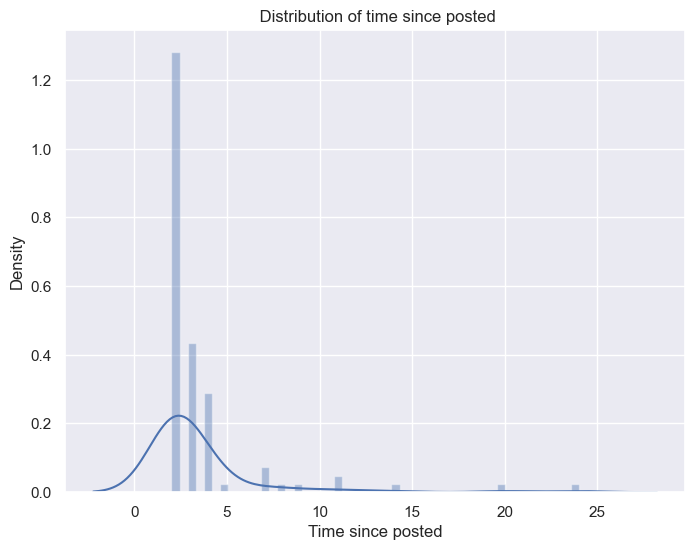

In [81]:
plt.figure(figsize=(8,6))
sns.distplot(df1['Time since posted'])
plt.title(' Distribution of time since posted')
plt.show()

From the above plot we can figure out that 'Times since posted' is slightly rigt skewed.

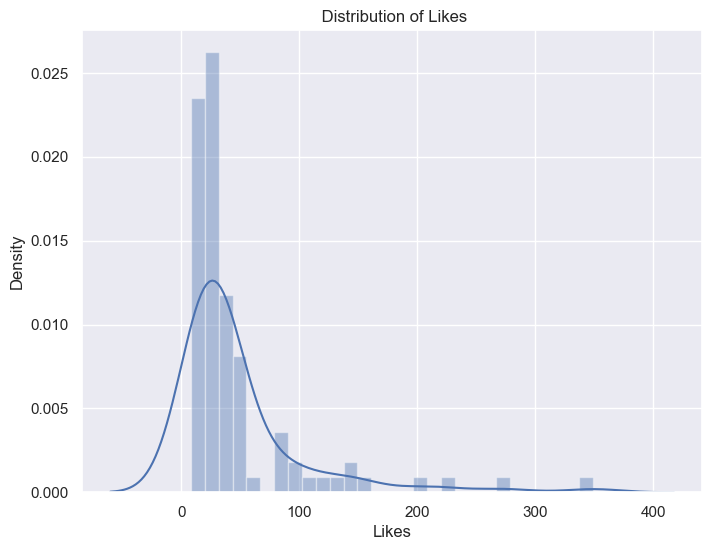

In [82]:
plt.figure(figsize=(8,6))
sns.distplot(df1['Likes'])
plt.title(' Distribution of Likes')
plt.show()

##Now let’s have a look at the correlation of all the columns with the Likes column

In [83]:
correlation = df1.corr()
print(correlation["Likes"].sort_values(ascending=False))

Likes                1.000000
Time since posted    0.609534
Followers            0.278040
Name: Likes, dtype: float64


In [84]:
correlation = df1.corr()
print(correlation["Time since posted"].sort_values(ascending=False))

Time since posted    1.000000
Likes                0.609534
Followers            0.265371
Name: Time since posted, dtype: float64


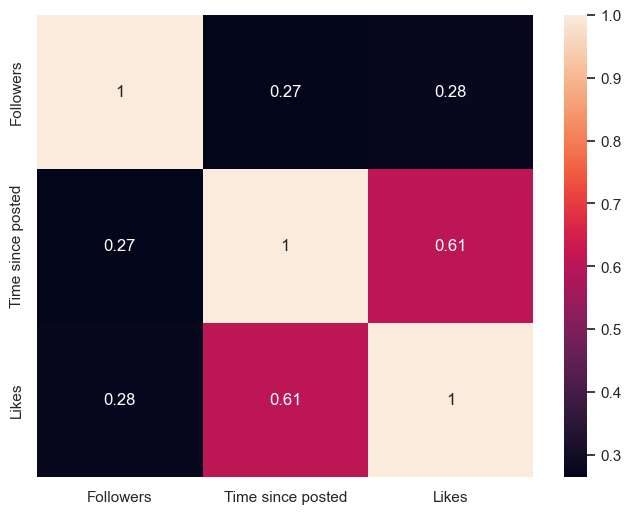

In [85]:
plt.figure(figsize=(8, 6))
sns.heatmap(df1.corr(), annot=True)
plt.show()

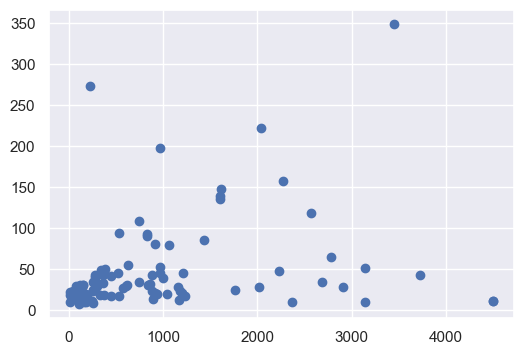

In [86]:
sns.set(rc={'figure.figsize':(6,4)})
plt.scatter(df1['Followers'],df1['Likes'])

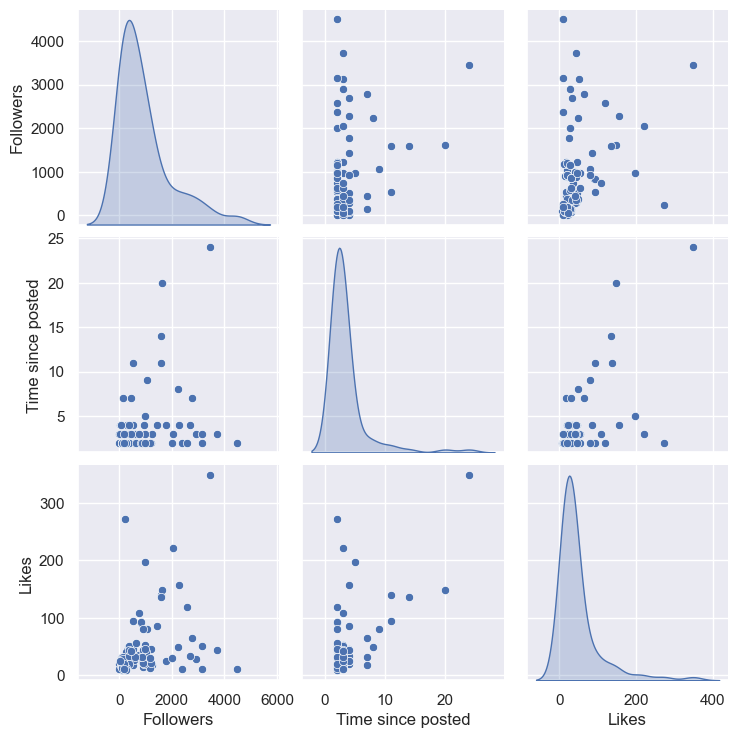

In [87]:
# Relationships between features
sns.pairplot(df1,diag_kind='kde')

## Train | Test Split

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
X = df1[['Followers', 'Time since posted']]
y = df1['Likes']

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [92]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [93]:
from sklearn.linear_model import LinearRegression

In [94]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [95]:
## print the coefficients and the intercept
print(regression.coef_)

[ 5.58979546 19.57808306]


In [96]:
print(regression.intercept_)

48.76923076923077


In [97]:
## PRediction for the test data
reg_pred=regression.predict(X_test)

In [98]:
reg_pred

array([197.73636662,  41.54150419,  42.2099882 ,  34.08960982,
        64.25685301,  39.26053025,  35.59042196,  50.26430136,
        60.41634683,  39.05736354,  34.20102382,  34.58769594,
        42.07235914,  39.16877754,  34.21413135,  48.15451667,
        34.31899158,  41.33807369,  83.86677247,  35.07267454,
        94.87815249,  36.87495986,  34.09616358,  40.4404717 ,
        33.48010969,  39.39160554,  58.87621211,  62.86719109,
        39.4178206 ])

Text(0, 0.5, 'Test Predicted Data')

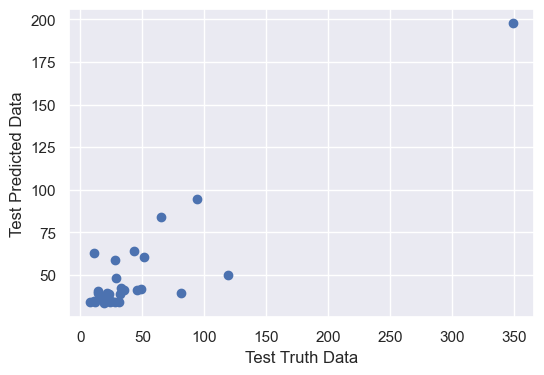

In [99]:
plt.scatter(y_test,reg_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [100]:
## residuals
residuals=y_test-reg_pred

In [101]:
residuals

55    151.263633
6      -6.541504
84     -9.209988
41    -26.089610
48    -21.256853
32    -25.260530
21    -16.590422
75     68.735699
47     -9.416347
90     -7.057364
45     -3.201024
76    -23.587696
3       6.927641
1     -16.168778
37    -10.214131
16    -19.154517
80     -6.318992
25      4.661926
54    -18.866772
2     -10.072675
13     -0.878152
56    -19.874960
92    -22.096164
83    -26.440472
31    -14.480110
43     41.608394
14    -30.876212
23    -51.867191
58    -18.417821
Name: Likes, dtype: float64

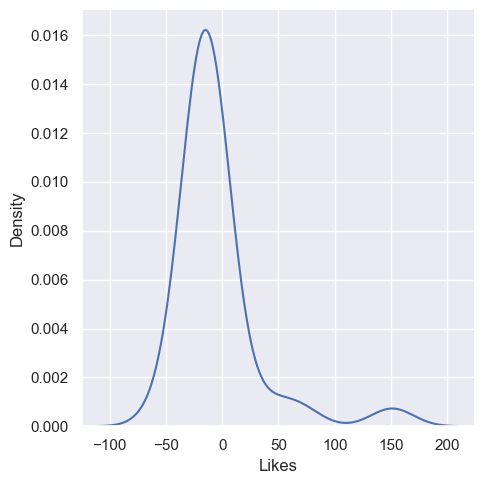

In [102]:
sns.displot(residuals,kind="kde")

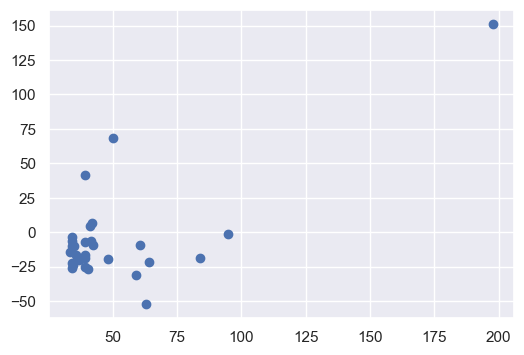

In [103]:
## SCatter plot with predictions and residual
##uniform distribution
plt.scatter(reg_pred,residuals)

In [104]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.6559349890510295


In [105]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6294684497472626

In [106]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

1354.8412809145234
23.69433022259998
36.8081686710236
